In [1]:
# DCT_JPEG / Multimedia Processing
# Gourav Siddhad
# 14-October-2019

In [2]:
print('Importing Libraries', end='')

import cv2
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

print(' - Done')

Importing Libraries - Done


In [3]:
def print_shape(img):
    print('{:5.2f} {:5.2f}'.format(np.min(img), np.max(img)), np.shape(img))
    
def prep_image(img, bsize):
    a, b, c = img.shape
    
    if a%bsize==0:
        a1 = a
    else:
        a1 = bsize*(a//bsize + 1)
        
    if b%bsize==0:
        b1 = b
    else:
        b1 = bsize*(b//bsize + 1)
    
    newimg = np.zeros((a1, b1, c))
    newimg[0:a, 0:b, :] = img[:, :, :]
    return np.array(newimg, dtype='uint8')

def calc_error(img1, img2):
    return np.array(img1-img2, dtype='uint8')

In [20]:
def calc_dct(img, bsize):
    a, b, c = img.shape
    nimg = np.zeros((a, b, c))
    
    for i in range(a//bsize):
        for j in range(b//bsize):
            for k in range(c):
                temp = img[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k]
                temp = dct(dct(temp, norm='ortho').T, norm='ortho')
                nimg[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k] = temp
    return np.array(nimg)

def calc_idct(img, bsize):
    a, b, c = img.shape
    nimg = np.zeros((a, b, c))
    
    for i in range(a//bsize):
        for j in range(b//bsize):
            for k in range(c):
                temp = img[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k]
                temp = idct(idct(temp, norm='ortho').T, norm='ortho')
                nimg[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k] = temp

    return np.array(nimg, dtype='uint8')

In [78]:
def quantize(t, percent):
    a, b = t.shape
    nval = percent*a*b//100
    uniq = sorted(np.unique(t))
    uniq = uniq[-nval:]
    
    for i in range(a):
        for j in range(b):
            if t[i, j] not in uniq:
                t[i, j] = 0
    return t

def quantize_mask(t):
    a, b = t.shape
    
    mask = np.zeros((bsize, bsize))
    for i in range(bsize):
        for j in range(bsize-i):
            mask[i, j] = 1
    
    return np.multiply(t, mask)

def quantize_matrix(t):
    mat = [[16, 11, 10, 16, 24, 40, 51, 61],
           [12, 12, 14, 19, 26, 58, 60, 55],
           [14, 13, 16, 24, 40, 57, 69, 56],
           [14, 17, 22, 29, 51, 87, 80, 62],
           [18, 22, 37, 56, 68, 109, 103, 77],
           [24, 35, 55, 64, 81, 104, 113, 92],
           [49, 64, 78, 87, 103, 121, 120, 101],
           [72, 92, 95, 98, 112, 100, 103, 99]]
    return np.array(t)/ np.array(mat)

def iquantize_matrix(t):
    mat = [[16, 11, 10, 16, 24, 40, 51, 61],
           [12, 12, 14, 19, 26, 58, 60, 55],
           [14, 13, 16, 24, 40, 57, 69, 56],
           [14, 17, 22, 29, 51, 87, 80, 62],
           [18, 22, 37, 56, 68, 109, 103, 77],
           [24, 35, 55, 64, 81, 104, 113, 92],
           [49, 64, 78, 87, 103, 121, 120, 101],
           [72, 92, 95, 98, 112, 100, 103, 99]]
    return np.array(t)*np.array(mat)

def calc_quant(img, bsize, percent):
    a, b, c = img.shape
    nimg = np.zeros((a, b, c))
    
    for i in range(a//bsize):
        for j in range(b//bsize):
            for k in range(c):
                temp = img[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k]
                temp = quantize_matrix(temp)
                nimg[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k] = temp
    return np.round(nimg)

def calc_iquant(img, bsize, percent):
    a, b, c = img.shape
    nimg = np.zeros((a, b, c))
    
    for i in range(a//bsize):
        for j in range(b//bsize):
            for k in range(c):
                temp = img[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k]
                temp = iquantize_matrix(temp)
                nimg[i*bsize:(i+1)*bsize, j*bsize:(j+1)*bsize, k] = temp
        
    return np.array(nimg)

In [79]:
def rl_encode(string):
    lst = []
    count = 1
    prev = None
    for val in string:
        if val != prev:
            if prev is not None:
                entry = (prev, count)
                lst.append(entry)
            count = 1
            prev = val
        else:
            count += 1
    return lst

def rl_decode(lst):
    q = []
    for val, count in lst:
        for i in range(count):
            q.append(val)
    return q

 0.00 255.00 (512, 512, 3)


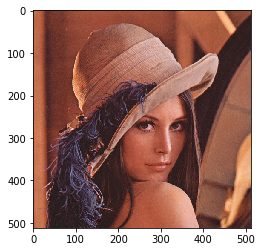

In [80]:
img = cv2.imread('lena.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print_shape(img)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


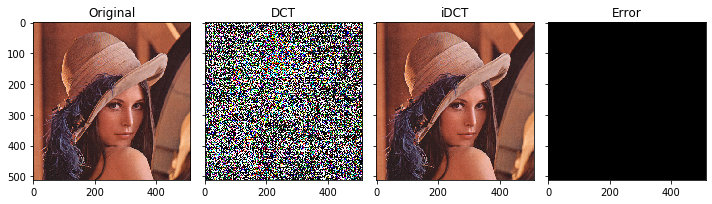

In [81]:
bsize = 8

img = prep_image(img, bsize)
dimg = calc_dct(img, bsize)
idimg = calc_idct(dimg, bsize)
err = calc_error(img, idimg)

fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(dimg)
ax[1].set_title('DCT')

ax[2].imshow(idimg)
ax[2].set_title('iDCT')

ax[3].imshow(err)
ax[3].set_title('Error')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


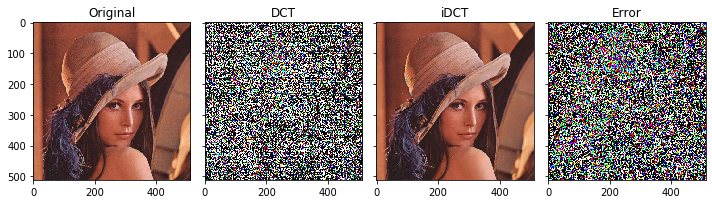

In [82]:
img = prep_image(img, bsize)
dimg = calc_dct(img, bsize)
qdct = calc_quant(dimg, bsize, 0)
iqdct = calc_iquant(qdct, bsize, 0)
idimg = calc_idct(iqdct, bsize)
err = calc_error(img, idimg)

fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(dimg)
ax[1].set_title('DCT')

ax[2].imshow(idimg)
ax[2].set_title('iDCT')

ax[3].imshow(err)
ax[3].set_title('Error')

plt.tight_layout()
plt.show()